In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import scipy.stats as st
from scipy import stats
import random
np.random.seed(41)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
RANDOM_SEED = 110011

In [3]:
adata = sc.read_h5ad('./data/GSE_158055_COVID19_ALL.h5ad')
adata

AnnData object with n_obs × n_vars = 1462702 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'har_emb'
    obsp: 'connectivities', 'distances'

In [4]:
# Delete 'X_umap' for this experiment.
#del adata.obsm['X_umap']
del adata.uns['neighbors']
del adata.uns['pca']
del adata.obsm['X_pca']
#del adata.uns['umap']
#del adata.varm['PCs']
del adata.obsp

In [5]:
adata.obs

,celltype,majorType,sampleID,PatientID,datasets,City,Age,Sex,Sample type,CoVID-19 severity,...,Single cell sequencing platform,BCR single cell sequencing,TCR single cell sequencing,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished
AACAGGGGTCGGATTT-0,Mono_c1-CD14-CCL3,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AACCAACGTCCGAAAG-0,B_c02-MS4A1-CD27,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AACCTTTGTAGCACGA-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AAGCATCTCTATCGCC-0,Mono_c2-CD14-HLA-DPB1,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
AATCACGGTCATAAAG-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,10X 3',No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGCAG-283,Mega,Mega,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCCGCTGTT-283,B_c06-MKI67,Plasma,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCGTCGTTC-283,T_CD8_c01-LEF1,CD8,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes
TTTGTCATCTGTACGA-283,NK_c01-FCGR3A,NK,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,10X 5',No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes


In [6]:
adata.obs['sampleID'] = adata.obs['sampleID'].astype('str')
adata.obs['CoVID-19 severity'] = adata.obs['CoVID-19 severity'].astype('str')

In [7]:
adata.obs.dtypes

celltype                                           category
majorType                                          category
sampleID                                             object
PatientID                                          category
datasets                                           category
City                                               category
Age                                                category
Sex                                                category
Sample type                                        category
CoVID-19 severity                                    object
Sample time                                        category
Sampling day (Days after symptom onset)            category
SARS-CoV-2                                         category
Single cell sequencing platform                    category
BCR single cell sequencing                         category
TCR single cell sequencing                         category
Outcome                                 

In [8]:
# Make a new column that has the combined information of the sampleID and CoVID-19 severity.
adata.obs['sampleID_label'] = adata.obs['sampleID'] + '_' + adata.obs['CoVID-19 severity']

In [9]:
adata.obs

,celltype,majorType,sampleID,PatientID,datasets,City,Age,Sex,Sample type,CoVID-19 severity,...,BCR single cell sequencing,TCR single cell sequencing,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished,sampleID_label
AACAGGGGTCGGATTT-0,Mono_c1-CD14-CCL3,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical
AACCAACGTCCGAAAG-0,B_c02-MS4A1-CD27,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical
AACCTTTGTAGCACGA-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical
AAGCATCTCTATCGCC-0,Mono_c2-CD14-HLA-DPB1,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical
AATCACGGTCATAAAG-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCCACGCAG-283,Mega,Mega,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes,S-S053_severe/critical
TTTGTCATCCGCTGTT-283,B_c06-MKI67,Plasma,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes,S-S053_severe/critical
TTTGTCATCGTCGTTC-283,T_CD8_c01-LEF1,CD8,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes,S-S053_severe/critical
TTTGTCATCTGTACGA-283,NK_c01-FCGR3A,NK,S-S053,P-S053,d17,Beijing,46,F,frozen PBMC,severe/critical,...,No,Yes,discharged,Hypertension,"Traditional Chinese medicine, Antiviral therapy",unknown,unknown,unknown,Yes,S-S053_severe/critical


In [10]:
# Count unique values in oVID-19 severity type with repect to each SampleID.
adata.obs.groupby('sampleID_label')['CoVID-19 severity'].unique().value_counts()

[severe/critical]    134
[mild/moderate]      122
[control]             28
Name: CoVID-19 severity, dtype: int64

Clip adata with 30 samples with the severe/critical cases, 30 samples with the mild/moderate cases, and 28 samples with the control cases. -> In total, there are 88 cases. This clipping is conducted due to dying the kernel because of OoM. 

In [11]:
from numpy.random import default_rng

rng = default_rng()

# Pick up 30 samples of severe/critical cases randomly.
severe_critical_samples = adata.obs[adata.obs['CoVID-19 severity'] == 'severe/critical']['sampleID_label'].unique()
# randomly select 30 samples of severe/critical cases.
random_samples_severe_critical = rng.choice(a=severe_critical_samples, size=30, replace=False, shuffle=True)

# Pick up 30 samples of mild/moderate cases randomly.
mild_moderate_samples = adata.obs[adata.obs['CoVID-19 severity'] == 'mild/moderate']['sampleID_label'].unique()
# randomly select 30 samples of severe/critical cases.
random_samples_mild_moderate = rng.choice(a=mild_moderate_samples, size=30, replace=False, shuffle=True)

# Pick up 30 samples of control cases randomly.
control_samples = adata.obs[adata.obs['CoVID-19 severity'] == 'control']['sampleID_label'].unique()
# randomly select 30 samples of severe/critical cases.
random_samples_control = rng.choice(a=control_samples, size=28, replace=False, shuffle=True) # There are only 28 control samples.


In [12]:
# Filter out adata by selected samples.
adata = adata[adata.obs['sampleID_label'].isin(random_samples_severe_critical) | adata.obs['sampleID_label'].isin(random_samples_mild_moderate) | adata.obs['sampleID_label'].isin(random_samples_control)]
adata

View of AnnData object with n_obs × n_vars = 483460 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'sampleID_label'
    obsm: 'X_tsne', 'har_emb'

In [13]:
# Test if adata.obs['sampleID_label'] contains elemnets from three lists: random_samples_severe_critical, random_samples_mild_moderate and random_samples_control.
# If we find any row returns false, arise error. 
assert all(adata.obs['sampleID_label'].isin(random_samples_severe_critical) | adata.obs['sampleID_label'].isin(random_samples_mild_moderate) | adata.obs['sampleID_label'].isin(random_samples_control))
assert adata.obs['sampleID_label'].unique().size == 88

In [14]:
from sklearn.model_selection import train_test_split
list_samples = list(adata.obs['sampleID_label'].unique())
y_train, y_test = train_test_split(list_samples, test_size=0.20, random_state=RANDOM_SEED)

print("Samples for getting centroids of existing samples (covid and non-covid):", y_train)
print("Samples for testing:", y_test) 
print()
print("Length of y_train:", len(y_train))
print("Lenght of y_test:", len(y_test))

Samples for getting centroids of existing samples (covid and non-covid): ['S-M026-2_mild/moderate', 'S-HC014_control', 'S-HC010_control', 'S-M038_mild/moderate', 'S-S088-1_severe/critical', 'S-S074-1_severe/critical', 'S-M011_mild/moderate', 'S-M004-3_mild/moderate', 'S-S026_severe/critical', 'S-S001-3_severe/critical', 'S-HC019-2_control', 'S-HC011_control', 'S-HC001_control', 'S-M057_mild/moderate', 'S-HC008_control', 'S-HC013_control', 'S-M045_mild/moderate', 'S-M044-1_mild/moderate', 'S-S073-2_severe/critical', 'S-HC006_control', 'S-HC020-2_control', 'S-HC012_control', 'S-HC007_control', 'S-S027_severe/critical', 'S-S078_severe/critical', 'S-M050_mild/moderate', 'S-M003-3_mild/moderate', 'S-HC004_control', 'S-S064_severe/critical', 'S-S087-2_severe/critical', 'S-S014_severe/critical', 'S-M069_mild/moderate', 'S-M009-1_mild/moderate', 'S-M072_mild/moderate', 'S-HC018-2_control', 'S-S038_severe/critical', 'S-M010-4_mild/moderate', 'S-M004-4_mild/moderate', 'S-M015_mild/moderate', 'S-

In [15]:
### Make adata for train/existing data.
# Make a column that contains bool values based on whether the sample_name holds one of the samples in the y_train..
adata.obs['contain_y_train'] = adata.obs['sampleID_label'].isin(y_train)
adata_train = adata[adata.obs['contain_y_train'] == True,:].copy()

/tmp/ipykernel_50376/3743627571.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['contain_y_train'] = adata.obs['sampleID_label'].isin(y_train)


In [16]:
### Make adata for train/existing data.
# Make a column that contains bool values based on whether the sample_name holds one of the samples in the y_train..
adata.obs['contain_y_test'] = adata.obs['sampleID_label'].isin(y_test)
adata_test = adata[adata.obs['contain_y_test'] == True,:].copy()

In [17]:
del adata

In [18]:
sc.pp.neighbors(adata_train, n_pcs = 30, n_neighbors = 20) 
sc.tl.pca(adata_train)
#sc.pl.umap(adata_train, color='sample')

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:02:09)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:54)
computing PCA
    with n_comps=50
    finished (0:01:57)


In [26]:
sc.tl.umap(adata_train)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:33)


In [27]:
adata_train.write_h5ad('data/h5ab_folder/GSE_158055_COVID19_TRAIN.h5ad')

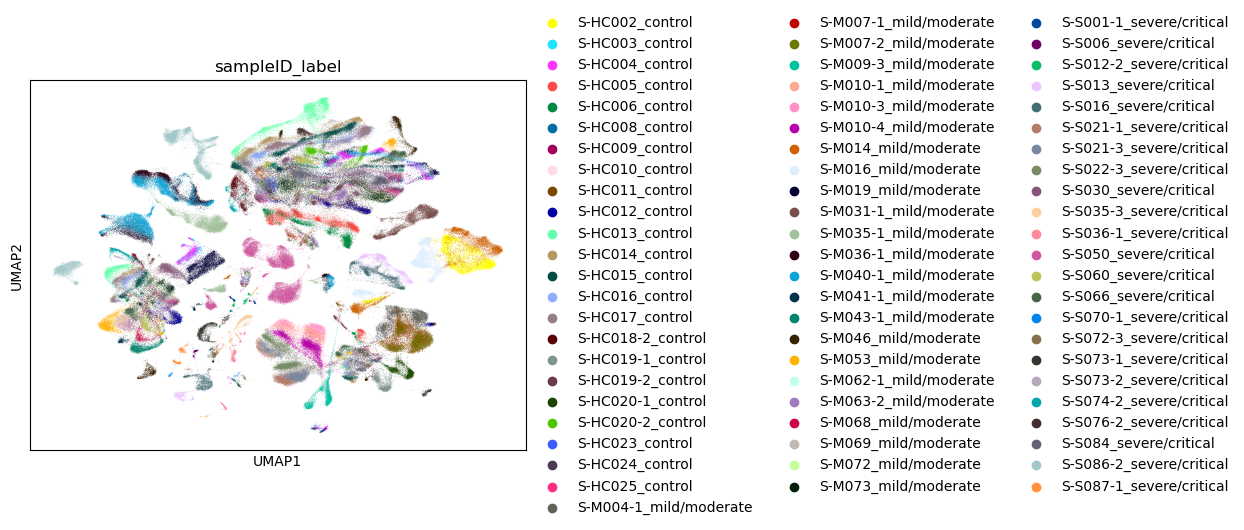

In [28]:
sc.pl.umap(adata_train, color=['sampleID_label'])

In [29]:
sc.tl.ingest(adata_test, adata_train, embedding_method='umap')

running ingest
    finished (0:02:05)


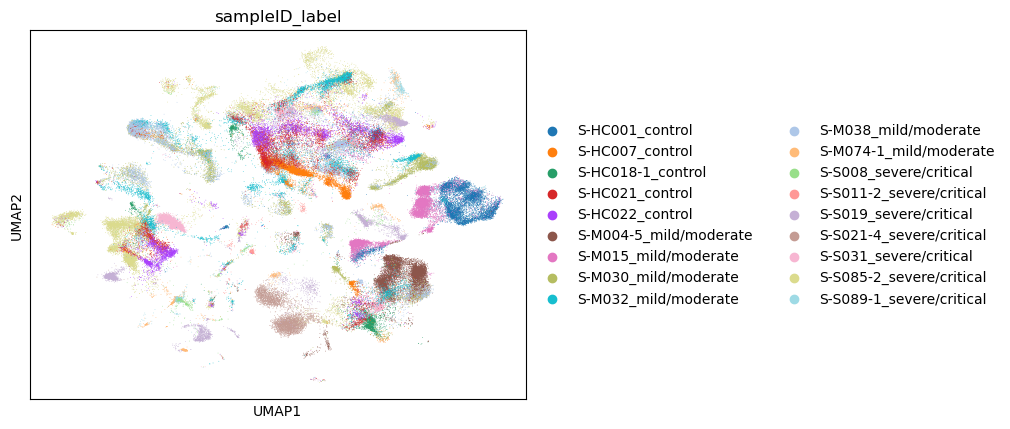

In [30]:
sc.pl.umap(adata_test, color=['sampleID_label'])

In [19]:
sc.tl.ingest(adata_test, adata_train, embedding_method='pca')

running ingest
    finished (0:00:25)


In [32]:
adata_train.write_h5ad('data/h5ab_folder/GSE_158055_COVID19_TRAIN.h5ad')
adata_test.write_h5ad('data/h5ab_folder/GSE_158055_COVID19_TEST.h5ad')